# Chapter 1: What is the top complaint type?
Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 500
pd.options.display.max_columns = 60

sns.set()
sns.set_style('whitegrid')

In [2]:
# Loading the relevant data.
df311_raw = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")
df311_raw.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


## Data cleaning

In [3]:
# Saving copy of the data.
df311_cl = df311_raw.copy()

In [4]:
# Dropping the blank column 'Unnamed'.
df311_cl = df311_cl.drop('Unnamed: 0',axis=1)

# Converting the included timestamp to a more programming-friendly format.
df311_cl['Created DateTime'] = pd.to_datetime(df311_cl['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df311_cl['Year'] = pd.DatetimeIndex(df311_cl['Created DateTime']).year
df311_cl['Month'] = pd.DatetimeIndex(df311_cl['Created DateTime']).month

In [5]:
complaint_count = df311_cl['Complaint Type'].value_counts()
complaint_count

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

#### Note: 
Issue found with complaint types, thus we also need some aggregation before we can dive into further analysis. It's not fully clear, if "General" actually belongs to "GENERAL CONSTRUCTION". Therefore, they will not be merged.

In [6]:
# Cleaning up the complaint types 
df311_cl['Complaint Type'] = df311_cl['Complaint Type'].str.upper() # Also hits 'Plumbing' as well as 'General' and 'Safety'
df311_cl['Complaint Type'].replace('HEATING', 'HEAT/HOT WATER', inplace=True)
df311_cl['Complaint Type'].replace('HEAT/HOT WATER', 'HEAT / HOT WATER', inplace=True)
df311_cl['Complaint Type'].replace('PAINT - PLASTER', 'PAINT/PLASTER', inplace=True)
df311_cl['Complaint Type'].replace('CONSTRUCTION', 'GENERAL CONSTRUCTION', inplace=True)

## Exploratory data analysis (EDA)

In [7]:
# Function to add value labels to bar/column charts, which are created through the Seaborn package
# Credits go out to Secant Zhang on Stackoverflow (https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values) 
# for providing the following code publicly.

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

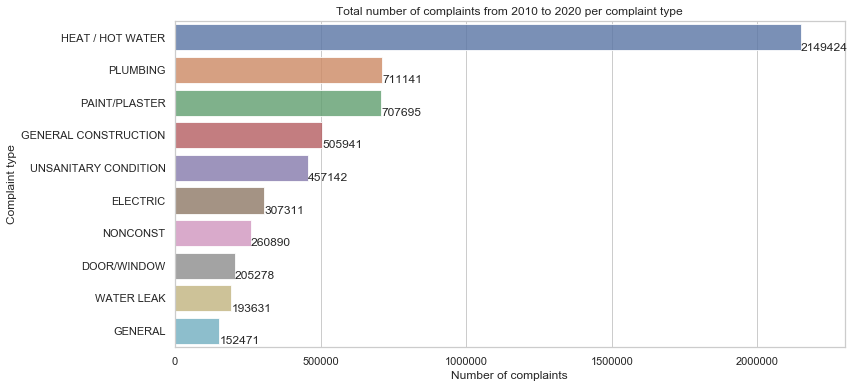

In [8]:
# Creating a bar chart, which shows the total number of complains per complaint type (focus on top 10)
complaint_count = df311_cl['Complaint Type'].value_counts()
complaint_count = complaint_count[:10,]

plt.figure(figsize=(12,6))
sns_t = sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Total number of complaints from 2010 to 2020 per complaint type')
plt.ylabel('Complaint type', fontsize=12)
plt.xlabel('Number of complaints', fontsize=12)
sns_t.set(xlim=(0, 2300000))

show_values_on_bars(sns_t,"h",0.2)

#### Note: 
At first glance, complaints around heat / hot water are occuring the most by a very large margin, thus indicating a potential (severe) issue, that needs to be dealt with according to this summary. 

Further down the line, we also need to evaluate whether there a annual trends, which need to be considered for future planning as well.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


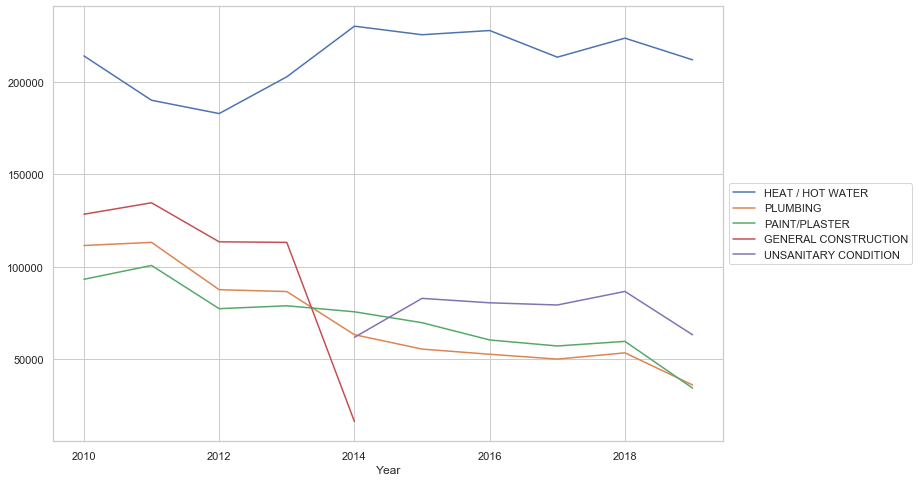

In [9]:
df_compl_time = df311_cl[['Unique Key', 'Complaint Type', 'Year']]

df_compl_time_gr = df_compl_time.groupby(['Year', 'Complaint Type']).count()['Unique Key'].unstack()
df_compl_time_gr_top5 = df_compl_time_gr[['HEAT / HOT WATER', 'PLUMBING', 'PAINT/PLASTER', 'GENERAL CONSTRUCTION', 'UNSANITARY CONDITION']]

# Dropping the year 2020, since it is just incomplete.
df_compl_time_gr_top5.drop(df_compl_time_gr_top5[df_compl_time_gr_top5.index == 2020].index, axis=0, inplace=True)

df_compl_time_gr_top5.plot(figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [10]:
# Condensing the dataframe to a smaller file only containing complaints around heating.
df311_h = df311_cl.copy()
df311_h.drop(df311_h[df311_h['Complaint Type'] != 'HEAT / HOT WATER'].index, axis=0, inplace=True)
df311_h = df311_h.reset_index(drop=True)

df311_h.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Created DateTime,Year,Month
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993,2020-02-02 06:09:17,2020,2
1,45527528,02/02/2020 02:27:41 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432,2020-02-02 02:27:41,2020,2
2,45530329,02/02/2020 12:13:18 PM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558,2020-02-02 12:13:18,2020,2
3,45530344,02/02/2020 07:52:08 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218,2020-02-02 07:52:08,2020,2
4,45527939,02/02/2020 09:00:54 AM,NaN,HEAT / HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.749320,-73.885190,2020-02-02 09:00:54,2020,2


In [11]:
# Loading the relevant data into a pickle file. It's the same file you can download from the link on the README.md page.
df311_h.to_pickle('df311_h.pkl')

## Conclusion

Complaints about heating are dominant in absolute numbers compared to the other reasons for complaint - both in a momentary view as well as in a year on year comparison.

Plumbing and paint/plaster are steadily decreasing. Interestingly, there has been a recategorisation in the period 2013/2014. For example, the "General Construction" segment has been dissolved and replaced by somewhat more specific categories such as "unsanitary condition". 

In the following, the main cause of complaints, heat, will be concentrated and further elaborated.